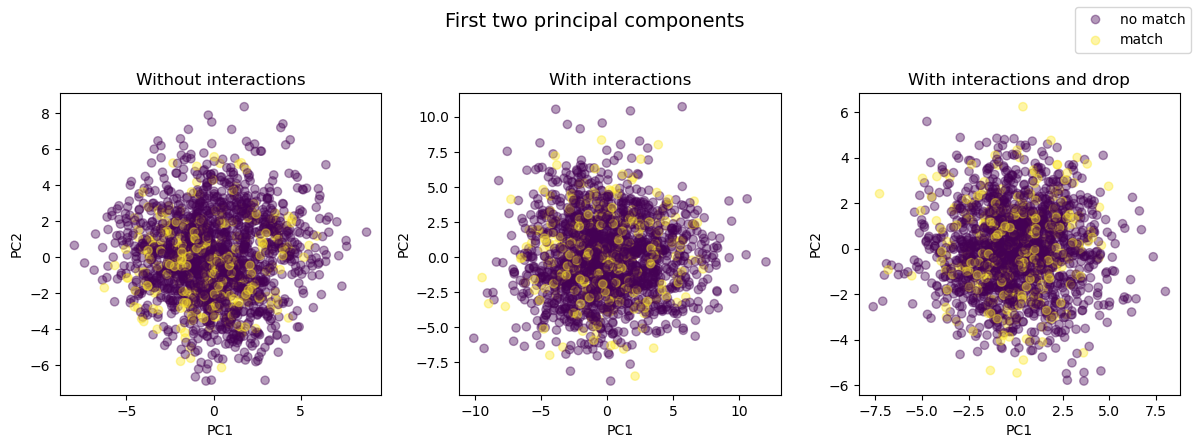

In [24]:
from preprocessing import load_dataset, split_dataset, grid_search, corresponding_features_interaction
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# first, we load the dataset
X, y = load_dataset('./data/data.pkl')
# then, we split it
X_tr, y_tr, X_te, y_te = split_dataset(X, y, test=0.2, stratify=True)

# Scale the features
scaler = StandardScaler()

X_tr_scaled = scaler.fit_transform(X_tr)

# Visualize
pca = PCA()
X_pca = pca.fit_transform(X_tr_scaled)

fig = plt.figure(figsize=(12, 4.5))
gs = plt.GridSpec(1, 3)

fig.suptitle('First two principal components', fontsize=14)

# Add the subplots
ax1 = fig.add_subplot(gs[0])

plt.title('Without interactions')
ax1.scatter(X_pca[:,0], X_pca[:,1], c=y_tr, alpha=0.4)
plt.xlabel("PC1")
plt.ylabel("PC2")

X_tr_int = corresponding_features_interaction(X_tr, drop=False)
X_tr_scaled = scaler.fit_transform(X_tr_int)

# Visualize
pca = PCA()
X_pca = pca.fit_transform(X_tr_scaled)

ax2 = fig.add_subplot(gs[1])

plt.title('With interactions')
ax2.scatter(X_pca[:,0], X_pca[:,1], c=y_tr, alpha=0.4)
plt.xlabel("PC1")
plt.ylabel("PC2")

X_tr_int = corresponding_features_interaction(X_tr)
X_tr_scaled = scaler.fit_transform(X_tr_int)

# Visualize
pca = PCA()
X_pca = pca.fit_transform(X_tr_scaled)

ax3 = fig.add_subplot(gs[2])

plt.title('With interactions and drop')
plot = ax3.scatter(X_pca[:,0], X_pca[:,1], c=y_tr, alpha=0.4)
plt.xlabel("PC1")
plt.ylabel("PC2")

fig.legend(handles=plot.legend_elements()[0], labels=['no match', 'match'], loc='upper right')

fig.tight_layout()
fig.subplots_adjust(top=0.8) # or whatever